
<h1 style="text-align: center;" >Task 1 </h1>
<h1 style="text-align: center;" >DATE : MARCH  27,2024 </h1><h1 style="text-align: center;" > NAME : ANTIM PAL </h1>
       <a hraf=""> <h1 style="text-align: center;" > EMAIL : antimpal01617121@gmail.com </h1></a>
        <h1 style="text-align: center;" >project for Youtube streamer </h1>

### Top 1000 youtubers statistics

1. Data Exploration:

- Start by exploring the dataset to understand its structure and identify key variables.
- Check for missing data and outliers.

2. Trend Analysis:

- Identify trends among the top YouTube streamers. Which categories are the most popular?
- Is there a correlation between the number of subscribers and the number of likes or comments?

3. Audience Study:

- Analyze the distribution of streamers audiences by country. Are there regional preferences for specific content categories?

4. Performance Metrics:

- Calculate and visualize the average number of subscribers, visits, likes, and comments.
- Are there patterns or anomalies in these metrics?
5. Content Categories:
- Explore the distribution of content categories. Which categories have the highest number of
streamers?
- Are there specific categories with exceptional performance metrics?
6. Brands and Collaborations:
- Analyze whether streamers with high performance metrics receive more brand collaborations and
marketing campaigns.
7. Benchmarking:
- Identify streamers with above-average performance in terms of subscribers, visits, likes, and comments.
- Who are the top-performing content creators?
8. Content Recommendations:
- Propose a system for enhancing content recommendations to YouTube users based on streamers
categories and performance metrics.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.metrics.pairwise import cosine_similarity

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 10)

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

C:\Users\antim\AppData\Local\Temp\ipykernel_20748\288434185.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
import cosinesimilarity

# 1. Data Exploration:
- **Start by exploring the dataset to understand its structure and identify key variables.**
- **Check for missing data and outliers.**


In [5]:
df=pd.read_csv(r'D:\@PROJECTS\Panda Project\Task 1 YouTube Streamer Analysis\youtubers_df.csv')

In [6]:
df.head()

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
0,1,tseries,Música y baile,249500000.0,India,86200.0,2700.0,78.0,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,3,CoComelon,Educación,165500000.0,Unknown,7000000.0,24700.0,0.0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
3,4,SETIndia,NaN,162600000.0,India,15600.0,166.0,9.0,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...
4,5,KidsDianaShow,"Animación, Juguetes",113500000.0,Unknown,3900000.0,12400.0,0.0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...


In [7]:
df.nunique()

Rank          1000
Username       994
Categories      45
Suscribers     274
Country         29
Visits         713
Likes          648
Comments       389
Links          994
dtype: int64

In [8]:
df['Categories'].unique()

array(['Música y baile', 'Videojuegos, Humor', 'Educación', nan,
       'Animación, Juguetes', 'Películas, Videojuegos', 'Juguetes',
       'Videojuegos', 'Películas, Animación', 'Películas',
       'Noticias y Política', 'Animación, Humor',
       'Música y baile, Animación', 'Música y baile, Películas',
       'Películas, Juguetes', 'Películas, Humor', 'Vlogs diarios',
       'Videojuegos, Juguetes', 'Animación, Videojuegos', 'Animación',
       'Música y baile, Humor', 'Diseño/arte, DIY y Life Hacks',
       'Ciencia y tecnología', 'Fitness, Salud y autoayuda',
       'Belleza, Moda', 'Humor', 'Comida y bebida', 'Deportes', 'Fitness',
       'Viajes, Espectáculos', 'Comida y bebida, Salud y autoayuda',
       'Diseño/arte', 'DIY y Life Hacks, Juguetes', 'Educación, Juguetes',
       'Juguetes, Coches y vehículos', 'Música y baile, Juguetes',
       'Animales y mascotas', 'ASMR', 'Moda', 'DIY y Life Hacks',
       'Diseño/arte, Belleza', 'Coches y vehículos',
       'Animación, Humor

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rank        1000 non-null   int64  
 1   Username    1000 non-null   object 
 2   Categories  694 non-null    object 
 3   Suscribers  1000 non-null   float64
 4   Country     1000 non-null   object 
 5   Visits      1000 non-null   float64
 6   Likes       1000 non-null   float64
 7   Comments    1000 non-null   float64
 8   Links       1000 non-null   object 
dtypes: float64(4), int64(1), object(4)
memory usage: 70.4+ KB


In [10]:
df.isnull().sum()

Rank            0
Username        0
Categories    306
Suscribers      0
Country         0
Visits          0
Likes           0
Comments        0
Links           0
dtype: int64

In [11]:
df.fillna({"Categories":"Unknow"}, inplace=True)

In [12]:
df.head()

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
0,1,tseries,Música y baile,249500000.0,India,86200.0,2700.0,78.0,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,3,CoComelon,Educación,165500000.0,Unknown,7000000.0,24700.0,0.0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
3,4,SETIndia,Unknow,162600000.0,India,15600.0,166.0,9.0,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...
4,5,KidsDianaShow,"Animación, Juguetes",113500000.0,Unknown,3900000.0,12400.0,0.0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...


In [13]:
df.duplicated().sum()

0

In [48]:
#Correcting the column name Subscribers to Subscribers
df.rename(mapper= {"Suscribers":"Subscribers"},axis=1 , inplace = True)
df.columns

Index(['Rank', 'Username', 'Categories', 'Subscribers', 'Country', 'Visits',
       'Likes', 'Comments', 'Links'],
      dtype='object')

In [49]:
df

,Rank,Username,Categories,Subscribers,Country,Visits,Likes,Comments,Links
0,1,tseries,Música y baile,249500000.0,India,86200.0,2700.0,78.0,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,3,CoComelon,Educación,165500000.0,Unknown,7000000.0,24700.0,0.0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
3,4,SETIndia,Unknow,162600000.0,India,15600.0,166.0,9.0,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...
4,5,KidsDianaShow,"Animación, Juguetes",113500000.0,Unknown,3900000.0,12400.0,0.0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...
...,...,...,...,...,...,...,...,...,...
995,996,hamzymukbang,Unknow,11700000.0,Estados Unidos,397400.0,14000.0,124.0,http://youtube.com/channel/UCPKNKldggioffXPkSm...
996,997,Adaahqueen,Unknow,11700000.0,India,1100000.0,92500.0,164.0,http://youtube.com/channel/UCk3fFpqI5kDMf__mUP...
997,998,LittleAngelIndonesia,Música y baile,11700000.0,Unknown,211400.0,745.0,0.0,http://youtube.com/channel/UCdrHrQf0o0TO8YDntX...
998,999,PenMultiplex,Unknow,11700000.0,India,14000.0,81.0,1.0,http://youtube.com/channel/UCObyBrdrtQ20BU9PxH...


#### The provided data contains data to youtube streamer and youtubers . here is some observations for the data sets.
 **1. Number of Entries :-** The data contain 1000 entries (Rows) with 0 to 999.<br>
**2. Columns :-** There are 9 columns in the data set with the following information: 
<li>Rank :         - Which is the rank of the youtuber (int64) with no missing values</li>
<li>UserName</li>
<li>Categories</li>
<li>Subscribers
<li>Country
<li>Visits
<li>Likes
<li>Comments
<li>Links

### Observation for the info about the Dataset

In [50]:
df.head(10)

,Rank,Username,Categories,Subscribers,Country,Visits,Likes,Comments,Links
0,1,tseries,Música y baile,249500000.0,India,86200.0,2700.0,78.0,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,3,CoComelon,Educación,165500000.0,Unknown,7000000.0,24700.0,0.0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
3,4,SETIndia,Unknow,162600000.0,India,15600.0,166.0,9.0,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...
4,5,KidsDianaShow,"Animación, Juguetes",113500000.0,Unknown,3900000.0,12400.0,0.0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...
5,6,PewDiePie,"Películas, Videojuegos",111500000.0,Estados Unidos,2400000.0,197300.0,4900.0,http://youtube.com/channel/UC-lHJZR3Gqxm24_Vd_...
6,7,LikeNastyaofficial,Juguetes,107500000.0,Unknown,2600000.0,28000.0,0.0,http://youtube.com/channel/UCJplp5SjeGSdVdwsfb...
7,8,VladandNiki,"Animación, Juguetes",101400000.0,Unknown,4100000.0,22100.0,0.0,http://youtube.com/channel/UCvlE5gTbOvjiolFlEm...
8,9,zeemusiccompany,Música y baile,99700000.0,India,74300.0,2600.0,32.0,http://youtube.com/channel/UCFFbwnve3yF62-tVXk...
9,10,WWE,Videojuegos,97200000.0,Estados Unidos,184500.0,6300.0,214.0,http://youtube.com/channel/UCJ5v_MCY6GNUBTO8-D...


In [51]:
df.describe()

,Rank,Subscribers,Visits,Likes,Comments
count,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000
mean,500.500000,2.189440e+07,1.209446e+06,5.363259e+04,1288.768000
std,288.819436,1.682775e+07,5.229942e+06,2.580457e+05,6778.188308
min,1.000000,1.170000e+07,0.000000e+00,0.000000e+00,0.000000
25%,250.750000,1.380000e+07,3.197500e+04,4.717500e+02,2.000000
50%,500.500000,1.675000e+07,1.744500e+05,3.500000e+03,67.000000
75%,750.250000,2.370000e+07,8.654750e+05,2.865000e+04,472.000000
max,1000.000000,2.495000e+08,1.174000e+08,5.300000e+06,154000.000000


In [52]:
df["Username"].describe()

count           1000
unique           994
top       NickyJamTV
freq               2
Name: Username, dtype: object

In [53]:
data=df["Categories"].value_counts()
data

Categories
Unknow                                306
Música y baile                        160
Películas, Animación                   61
Música y baile, Películas              41
Vlogs diarios                          37
                                     ... 
DIY y Life Hacks, Juguetes              1
Diseño/arte                             1
Comida y bebida, Salud y autoayuda      1
Viajes, Espectáculos                    1
Juguetes, DIY y Life Hacks              1
Name: count, Length: 46, dtype: int64

<Figure size 1000x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Boxplot of Numerical Variables')

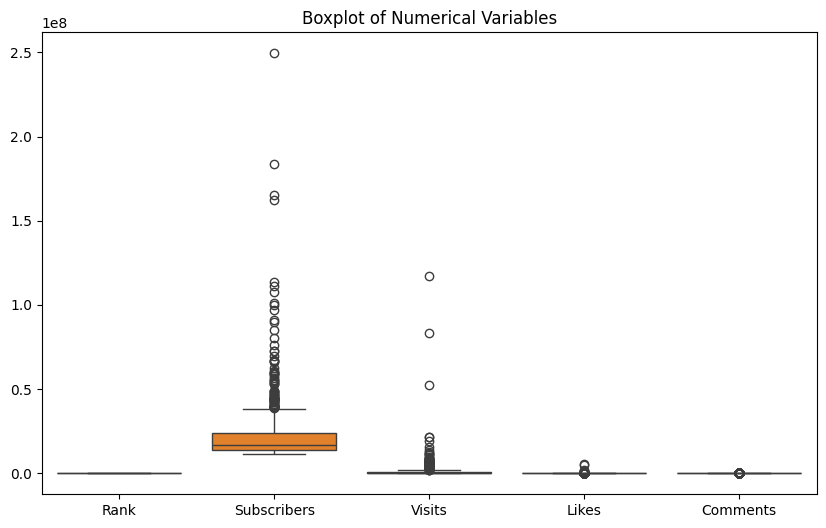

In [54]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title('Boxplot of Numerical Variables')
plt.show()

# 2. Trend Analysis:
- **Identify trends among the top YouTube streamers. Which categories are the most popular?**
- **Is there a correlation between the number of subscribers and the number of likes or comments?**

In [55]:
# Find the top 10 rows with the highest values in the 'Likes' column
top_likes = df.nlargest(10, 'Likes')
top_likes

,Rank,Username,Categories,Subscribers,Country,Visits,Likes,Comments,Links
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
136,137,MrBeast2,Vlogs diarios,31300000.0,Estados Unidos,83100000.0,5000000.0,11600.0,http://youtube.com/channel/UC4-79UOlP48-QNGgCk...
153,154,DaFuqBoom,"Animación, Humor",29800000.0,Estados Unidos,52700000.0,1700000.0,82800.0,http://youtube.com/channel/UCsSsgPaZ2GSmO6il8C...
341,342,triggeredinsaan,Humor,20400000.0,India,11100000.0,1400000.0,38000.0,http://youtube.com/channel/UCfLuT3JwLx8rvHjHfT...
734,735,Mythpat,Unknow,13900000.0,India,11700000.0,1200000.0,15800.0,http://youtube.com/channel/UCx6F-rETGiz7xf_vkM...
488,489,BeastPhilanthropy,Comida y bebida,16900000.0,Estados Unidos,21500000.0,952100.0,24000.0,http://youtube.com/channel/UCAiLfjNXkNv24uhpzU...
586,587,_vector_,Unknow,15400000.0,Estados Unidos,15400000.0,712400.0,1200.0,http://youtube.com/channel/UCzJ53fi4NuDCYWOk9P...
300,301,alfredolarin,Unknow,21900000.0,El Salvador,12900000.0,707600.0,2100.0,http://youtube.com/channel/UCd5ApCORQsMOZZz5E9...
123,124,MRINDIANHACKER,Unknow,32600000.0,India,6500000.0,617400.0,26000.0,http://youtube.com/channel/UCSiDGb0MnHFGjs4E2W...
238,239,alanbecker,"Animación, Videojuegos",24300000.0,Estados Unidos,7600000.0,582600.0,5900.0,http://youtube.com/channel/UCbKWv2x9t6u8yZoB3K...


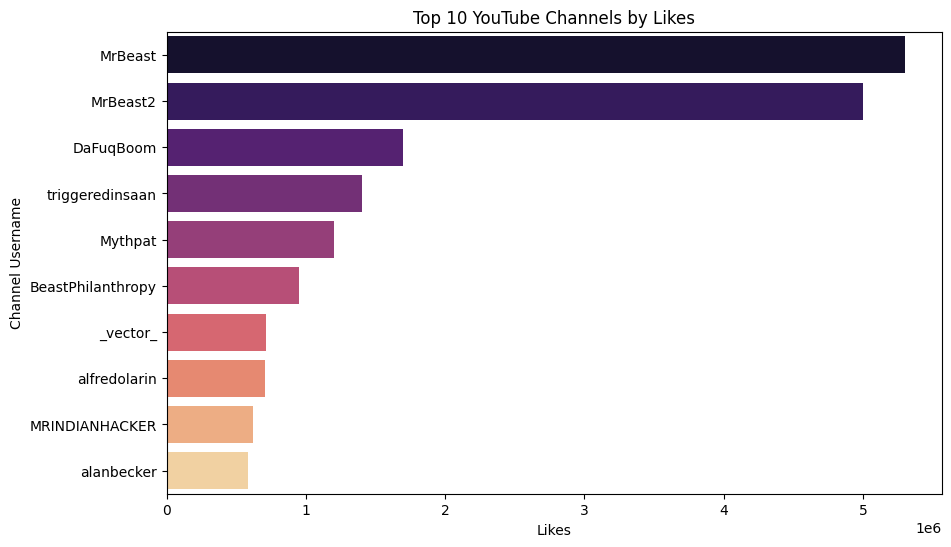

In [56]:
# Plotting the top 10 likes
plt.figure(figsize=(10, 6))
sns.barplot(x='Likes', y='Username', data=top_likes, palette='magma')
plt.title('Top 10 YouTube Channels by Likes')
plt.xlabel('Likes')
plt.ylabel('Channel Username')
plt.show();


In [72]:
# Find the top 10 rows with the highest values in the 'subscribers' column
top_subscribers = df.nlargest(10, 'Subscribers')
top_subscribers

,Rank,Username,Categories,Subscribers,Country,Visits,Likes,Comments,Links
0,1,tseries,Música y baile,249500000.0,India,86200.0,2700.0,78.0,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,3,CoComelon,Educación,165500000.0,Unknown,7000000.0,24700.0,0.0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
3,4,SETIndia,Unknow,162600000.0,India,15600.0,166.0,9.0,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...
4,5,KidsDianaShow,"Animación, Juguetes",113500000.0,Unknown,3900000.0,12400.0,0.0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...
5,6,PewDiePie,"Películas, Videojuegos",111500000.0,Estados Unidos,2400000.0,197300.0,4900.0,http://youtube.com/channel/UC-lHJZR3Gqxm24_Vd_...
6,7,LikeNastyaofficial,Juguetes,107500000.0,Unknown,2600000.0,28000.0,0.0,http://youtube.com/channel/UCJplp5SjeGSdVdwsfb...
7,8,VladandNiki,"Animación, Juguetes",101400000.0,Unknown,4100000.0,22100.0,0.0,http://youtube.com/channel/UCvlE5gTbOvjiolFlEm...
8,9,zeemusiccompany,Música y baile,99700000.0,India,74300.0,2600.0,32.0,http://youtube.com/channel/UCFFbwnve3yF62-tVXk...
9,10,WWE,Videojuegos,97200000.0,Estados Unidos,184500.0,6300.0,214.0,http://youtube.com/channel/UCJ5v_MCY6GNUBTO8-D...


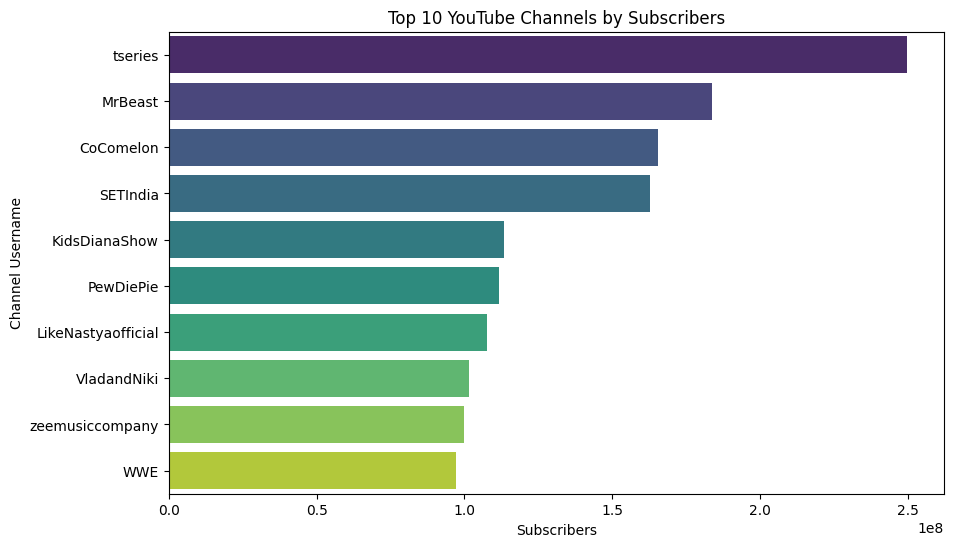

In [58]:
# Plotting the top 10 subscribers
plt.figure(figsize=(10, 6))
sns.barplot(x='Suscribers', y='Username', data=top_subscribers, palette='viridis')
plt.title('Top 10 YouTube Channels by Subscribers')
plt.xlabel('Subscribers')
plt.ylabel('Channel Username')
plt.show();


In [59]:
# Find the top 10 rows with the highest values in the 'Comments' column
top_comments = df.nlargest(10, 'Comments')
top_comments;


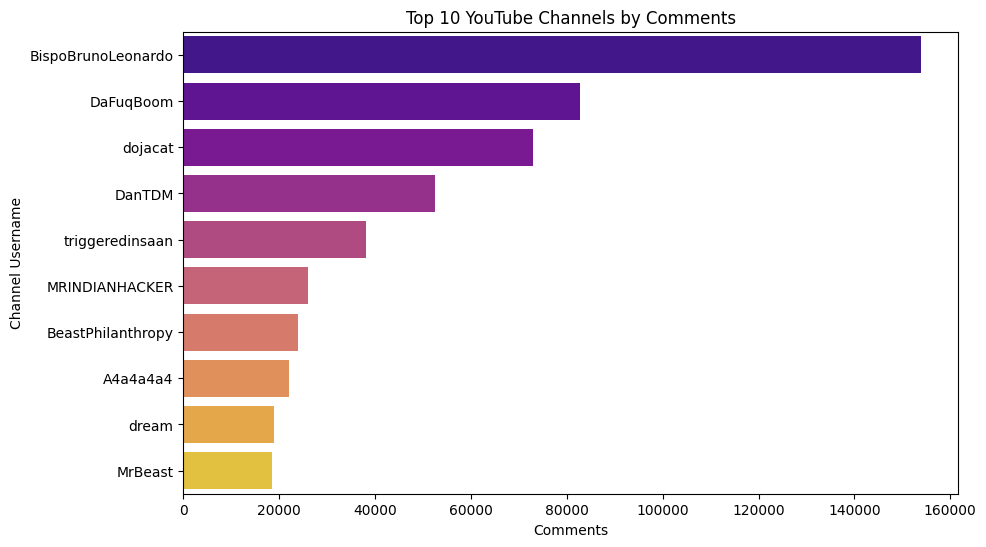

In [60]:

# Plotting the top 10 comments
plt.figure(figsize=(10, 6))
sns.barplot(x='Comments', y='Username', data=top_comments, palette='plasma')
plt.title('Top 10 YouTube Channels by Comments')
plt.xlabel('Comments')
plt.ylabel('Channel Username')
plt.show();

# 3. Audience Study:
- **Analyze the distribution of streamers**
'



# audiences by country. Are there regional preferences for specific content categories?

In [61]:
# Group data by country and category, and count the number of streamers
grouped_data = df.groupby(['Country', 'Categories']).size().reset_index(name='Count')
grouped_data

,Country,Categories,Count
0,Arabia Saudita,"Animación, Videojuegos",1
1,Arabia Saudita,Música y baile,2
2,Arabia Saudita,Unknow,1
3,Argelia,Educación,1
4,Argelia,Unknow,1
...,...,...,...
189,Unknown,"Películas, Juguetes",9
190,Unknown,"Películas, Videojuegos",1
191,Unknown,Unknow,35
192,Unknown,"Videojuegos, Juguetes",2


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


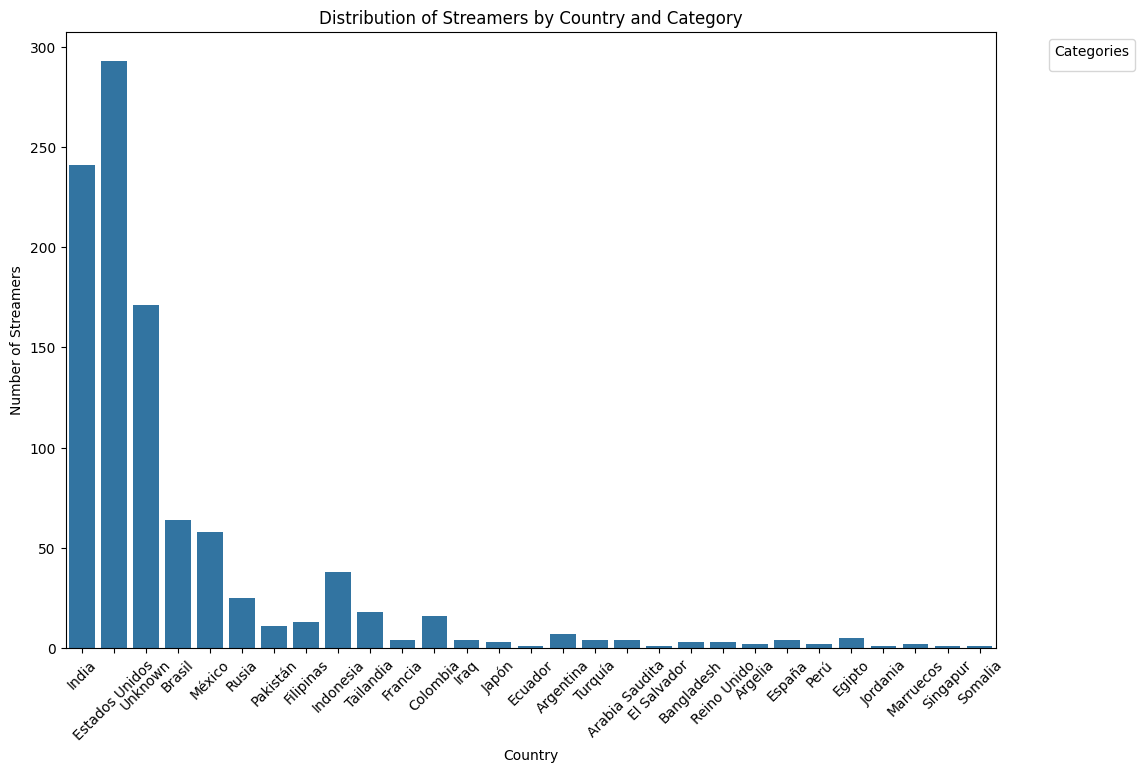

In [62]:
#lot a countplot to visualize the distribution of streamers by country and category
plt.figure(figsize=(12,8))
sns.countplot(x='Country', data=df)
plt.title('Distribution of Streamers by Country and Category')
plt.xlabel('Country')
plt.ylabel('Number of Streamers')
plt.xticks(rotation=45)
plt.legend(title='Categories', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show();

# 4. Performance Metrics:


#  Calculate and visualize the average number of subscribers, visits, likes, and comments.

In [71]:
# Calculate average metrics
average_metrics = df[['Subscribers', 'Visits', 'Likes', 'Comments']].mean()
average_metrics

Subscribers    2.189440e+07
Visits         1.209446e+06
Likes          5.363259e+04
Comments       1.288768e+03
dtype: float64

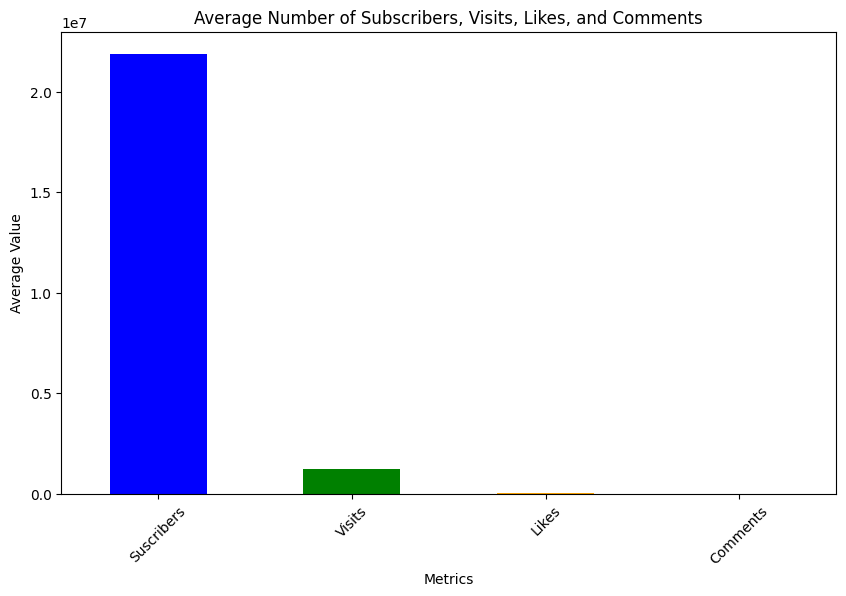

In [64]:
# Plot a bar chart for average metrics
plt.figure(figsize=(10, 6))
average_metrics.plot(kind='bar', color=['blue', 'green', 'orange', 'red'])
plt.title('Average Number of Subscribers, Visits, Likes, and Comments')
plt.xlabel('Metrics')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.show();


#  Are there patterns or anomalies in these metrics?

In [65]:
# Group data by content categories and count the number of streamers
category_counts = df['Categories'].value_counts()
category_counts

Categories
Unknow                                306
Música y baile                        160
Películas, Animación                   61
Música y baile, Películas              41
Vlogs diarios                          37
                                     ... 
DIY y Life Hacks, Juguetes              1
Diseño/arte                             1
Comida y bebida, Salud y autoayuda      1
Viajes, Espectáculos                    1
Juguetes, DIY y Life Hacks              1
Name: count, Length: 46, dtype: int64

# 5. Content Categories:



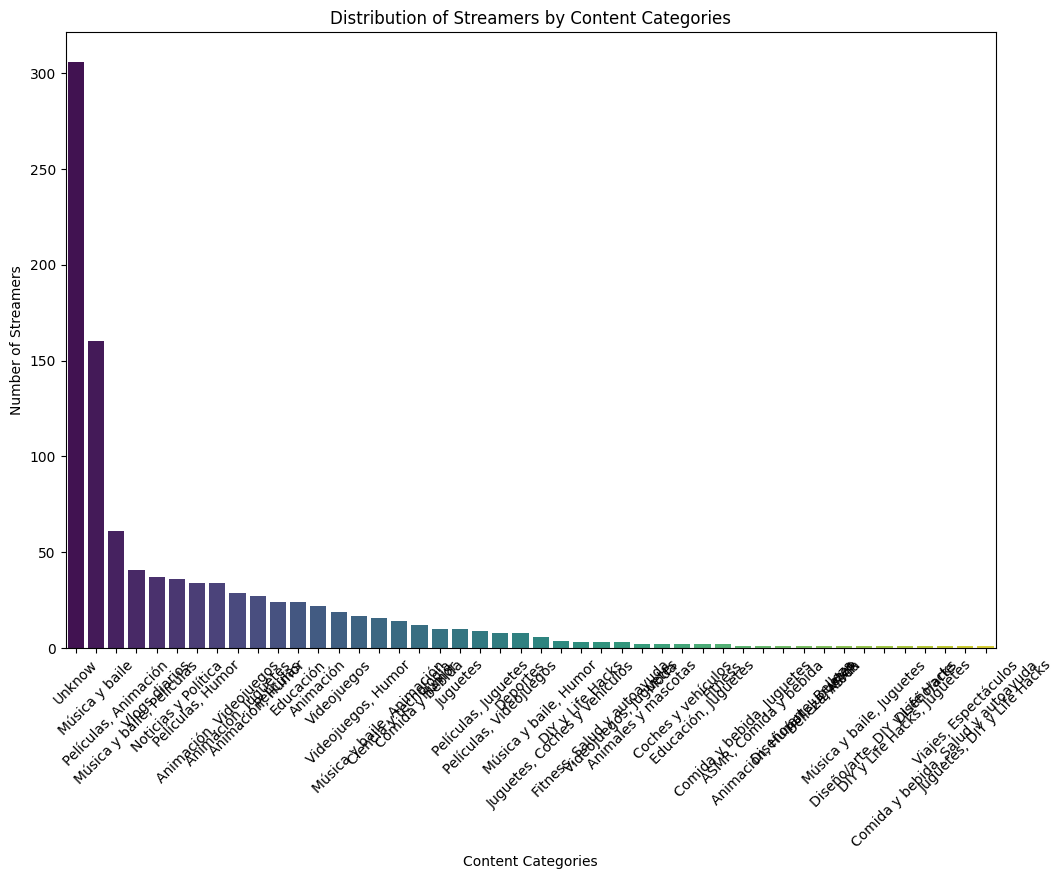

In [66]:
# Plot a bar chart to visualize the distribution of streamers by content categories
plt.figure(figsize=(12, 8))
sns.countplot(x='Categories', data=df, order=category_counts.index, palette='viridis')
plt.title('Distribution of Streamers by Content Categories')
plt.xlabel('Content Categories')
plt.ylabel('Number of Streamers')
plt.xticks(rotation=45)
plt.show();

# Explore the distribution of content categories. Which categories have the highest number of streamers?
# Are there specific categories with exceptional performance metrics?


In [70]:
# Calculate average metrics by content category
average_metrics_by_category = df.groupby('Categories')[['Subscribers', 'Visits', 'Likes', 'Comments']].mean()
average_metrics_by_category

,Subscribers,Visits,Likes,Comments
Categories,,,,
ASMR,1.520000e+07,3.685000e+05,4100.000000,148.000000
"ASMR, Comida y bebida",1.300000e+07,5.575000e+05,8600.000000,349.000000
Animación,1.764091e+07,6.367182e+05,21413.454545,396.636364
"Animación, Humor",2.078519e+07,3.760126e+06,145768.333333,5344.962963
"Animación, Humor, Juguetes",1.390000e+07,8.000000e+03,37.000000,0.000000
...,...,...,...,...
"Viajes, Espectáculos",2.040000e+07,8.950000e+04,782.000000,49.000000
Videojuegos,2.498421e+07,1.387137e+06,57121.052632,1760.157895
"Videojuegos, Humor",2.876471e+07,1.023968e+07,420511.764706,4827.058824


In [68]:
df

,Rank,Username,Categories,Subscribers,Country,Visits,Likes,Comments,Links
0,1,tseries,Música y baile,249500000.0,India,86200.0,2700.0,78.0,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,3,CoComelon,Educación,165500000.0,Unknown,7000000.0,24700.0,0.0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
3,4,SETIndia,Unknow,162600000.0,India,15600.0,166.0,9.0,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...
4,5,KidsDianaShow,"Animación, Juguetes",113500000.0,Unknown,3900000.0,12400.0,0.0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...
...,...,...,...,...,...,...,...,...,...
995,996,hamzymukbang,Unknow,11700000.0,Estados Unidos,397400.0,14000.0,124.0,http://youtube.com/channel/UCPKNKldggioffXPkSm...
996,997,Adaahqueen,Unknow,11700000.0,India,1100000.0,92500.0,164.0,http://youtube.com/channel/UCk3fFpqI5kDMf__mUP...
997,998,LittleAngelIndonesia,Música y baile,11700000.0,Unknown,211400.0,745.0,0.0,http://youtube.com/channel/UCdrHrQf0o0TO8YDntX...
998,999,PenMultiplex,Unknow,11700000.0,India,14000.0,81.0,1.0,http://youtube.com/channel/UCObyBrdrtQ20BU9PxH...


<Figure size 1200x800 with 0 Axes>

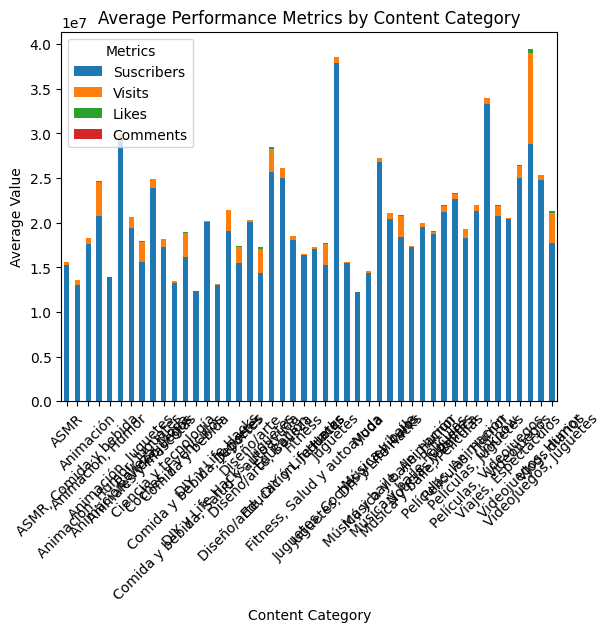

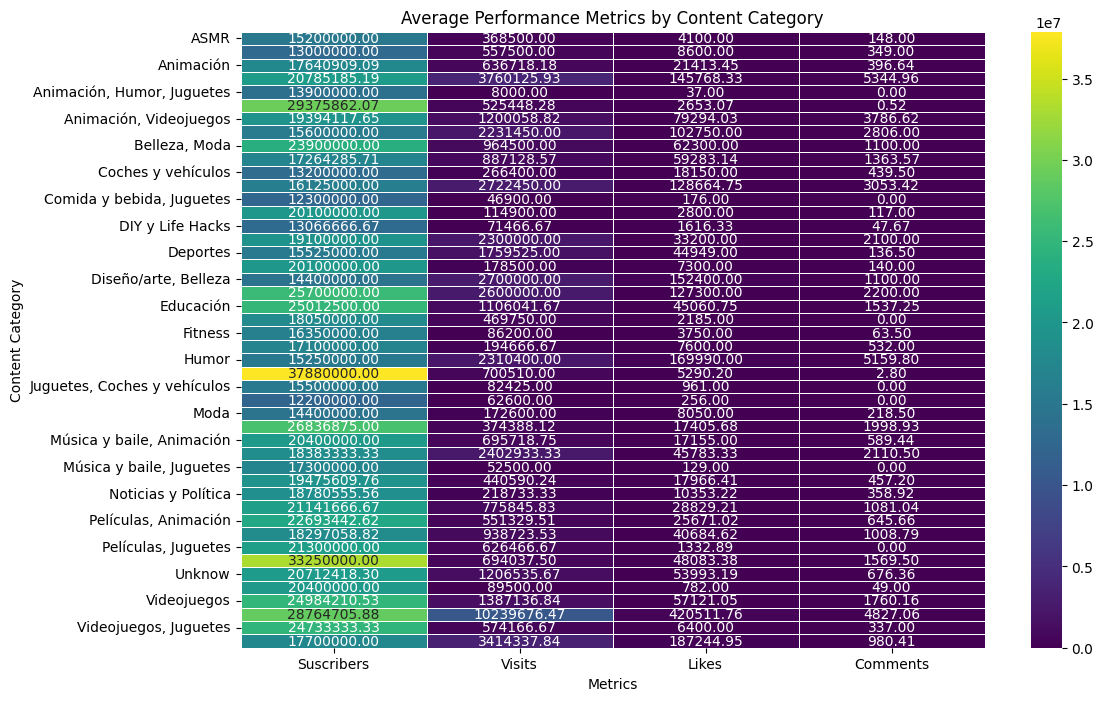

In [69]:
# Plot a bar chart to visualize average metrics by content category
plt.figure(figsize=(12, 8))
average_metrics_by_category.plot(kind='bar', stacked=True)
plt.title('Average Performance Metrics by Content Category')
plt.xlabel('Content Category')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.legend(title='Metrics')
plt.show();

# Alternatively, plot a heatmap for a clearer view of performance metrics
plt.figure(figsize=(12, 8))
sns.heatmap(average_metrics_by_category, cmap='viridis', annot=True, fmt='.2f', linewidths=.5)
plt.title('Average Performance Metrics by Content Category')
plt.xlabel('Metrics')
plt.ylabel('Content Category')
plt.show();


# 6. Brands and Collaborations:


# Analyze whether streamers with high performance metrics receive more brand collaborations and marketing campaigns.

In [40]:
# Calculate correlation between high-performance metrics and brand collaboration indicators
correlation_matrix = df[['Suscribers', 'Likes']].corr()
correlation_matrix

,Suscribers,Likes
Suscribers,1.000000,0.211639
Likes,0.211639,1.000000


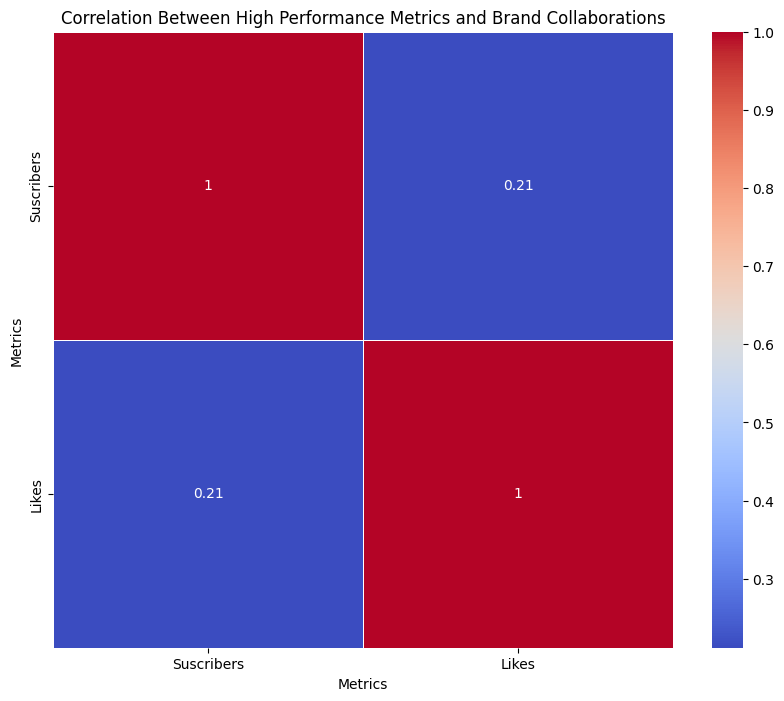

In [41]:
# Plot a heatmap to visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Between High Performance Metrics and Brand Collaborations')
plt.xlabel('Metrics')
plt.ylabel('Metrics')
plt.show();


# 7 Benchmarking:

# Identify streamers with above-average performance in terms of subscribers, visits, likes, and comments.


In [43]:
# Calculate average metrics
average_metrics = df[['Subscribers', 'Visits', 'Likes', 'Comments']].mean()
average_metrics

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
0,1,tseries,Música y baile,249500000.0,India,86200.0,2700.0,78.0,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,3,CoComelon,Educación,165500000.0,Unknown,7000000.0,24700.0,0.0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
3,4,SETIndia,Unknow,162600000.0,India,15600.0,166.0,9.0,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...
4,5,KidsDianaShow,"Animación, Juguetes",113500000.0,Unknown,3900000.0,12400.0,0.0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...
...,...,...,...,...,...,...,...,...,...
995,996,hamzymukbang,Unknow,11700000.0,Estados Unidos,397400.0,14000.0,124.0,http://youtube.com/channel/UCPKNKldggioffXPkSm...
996,997,Adaahqueen,Unknow,11700000.0,India,1100000.0,92500.0,164.0,http://youtube.com/channel/UCk3fFpqI5kDMf__mUP...
997,998,LittleAngelIndonesia,Música y baile,11700000.0,Unknown,211400.0,745.0,0.0,http://youtube.com/channel/UCdrHrQf0o0TO8YDntX...
998,999,PenMultiplex,Unknow,11700000.0,India,14000.0,81.0,1.0,http://youtube.com/channel/UCObyBrdrtQ20BU9PxH...


In [74]:
above_average_streamers = df[
    (df['Subscribers'] > average_metrics['Subscribers']) &
    (df['Visits'] > average_metrics['Visits']) &
    (df['Likes'] > average_metrics['Likes']) &
    (df['Comments'] > average_metrics['Comments'])
]
# Display streamers with above-average performance
above_average_streamers[['Username', 'Subscribers', 'Visits', 'Likes', 'Comments']]

,Username,Subscribers,Visits,Likes,Comments
1,MrBeast,183500000.0,117400000.0,5300000.0,18500.0
5,PewDiePie,111500000.0,2400000.0,197300.0,4900.0
26,dudeperfect,59700000.0,5300000.0,156500.0,4200.0
34,TaylorSwift,54100000.0,4300000.0,300400.0,15000.0
39,JuegaGerman,48600000.0,2000000.0,117100.0,3000.0
...,...,...,...,...,...
281,SSundee,22700000.0,1700000.0,59800.0,1800.0
282,souravjoshivlogs7028,22700000.0,5600000.0,382300.0,8900.0
288,VillageCookingChannel,22500000.0,21500000.0,321500.0,5900.0
300,alfredolarin,21900000.0,12900000.0,707600.0,2100.0


# 7  Who are the top-performing content creators?

In [ ]:
df['Normalized_subscribers'] = (df['Subscribers'] - df['Subscribers'].mean()) / df['Subscribers'].std()
df['Normalized_Visits'] = (df['Visits'] - df['Visits'].mean()) / df['Visits'].std()
df['Normalized_Likes'] = (df['Likes'] - df['Likes'].mean()) / df['Likes'].std()
df['Normalized_Comments'] = (df['Comments'] - df['Comments'].mean()) / df['Comments'].std()

In [ ]:
# Calculate combined score
df['Combined_Score'] = df['Normalized_subscribers'] + df['Normalized_Visits'] + df['Normalized_Likes'] + df['Normalized_Comments']
df['Combined_Score']

0      12.934831
1      54.690294
2       9.338791
3       7.737244
4       5.608251
         ...    
995    -1.086506
996    -0.642053
997    -1.191731
998    -1.231901
999    -1.234351
Name: Combined_Score, Length: 1000, dtype: float64

In [ ]:
# Rank content creators by combined score
top_performing_creators = df.sort_values(by='Combined_Score', ascending=False)

# Display top-performing content creators
print(top_performing_creators[['Username', 'subscribers', 'Visits', 'Likes', 'Comments', 'Combined_Score']].head(10))


               Username   Suscribers       Visits      Likes  Comments  \
1               MrBeast  183500000.0  117400000.0  5300000.0   18500.0   
136            MrBeast2   31300000.0   83100000.0  5000000.0   11600.0   
153           DaFuqBoom   29800000.0   52700000.0  1700000.0   82800.0   
436  BispoBrunoLeonardo   18000000.0     762100.0   276400.0  154000.0   
958             dojacat   11900000.0   13600000.0   395300.0   73000.0   
0               tseries  249500000.0      86200.0     2700.0      78.0   
341     triggeredinsaan   20400000.0   11100000.0  1400000.0   38000.0   
488   BeastPhilanthropy   16900000.0   21500000.0   952100.0   24000.0   
2             CoComelon  165500000.0    7000000.0    24700.0       0.0   
177              DanTDM   27800000.0    3500000.0   285000.0   52500.0   

     Combined_Score  
1         54.690294  
136       36.906766  
153       28.720792  
436       23.076125  
958       13.678996  
0         12.934831  
341       12.435972  
488      

# 8 Content Recommendations:
# Propose a system for enhancing content recommendations to YouTube users based on streamers categories and performance metrics.
'


In [ ]:
user_item_matrix=df.pivot_table(index="Username" , columns="Categories" , values="Subscribers" , fill_value=0)
user_item_matrix

Categories,ASMR,"ASMR, Comida y bebida",Animación,"Animación, Humor","Animación, Humor, Juguetes","Animación, Juguetes","Animación, Videojuegos",Animales y mascotas,"Belleza, Moda",Ciencia y tecnología,...,"Películas, Animación","Películas, Humor","Películas, Juguetes","Películas, Videojuegos",Unknow,"Viajes, Espectáculos",Videojuegos,"Videojuegos, Humor","Videojuegos, Juguetes",Vlogs diarios
Username,,,,,,,,,,,,,,,,,,,,,
-genevievesplayhouse1465,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
123GOSpanish,0.0,0.0,13900000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
123GO_,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1MILLION_Dance,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,26300000.0,0.0,0.0,0.0,0.0,0.0
1theK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zeetv,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,72500000.0,0.0,0.0,0.0,0.0,0.0
zeetvtelugu,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,14300000.0,0.0,0.0,0.0,0.0,0.0
zhong,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,31400000.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Assuming user_item_matrix is created correctly
user_item_matrix = df.pivot_table(index="Username", columns="Categories", values="Subscribers", fill_value=0)
cosine_sim = cosine_similarity(user_item_matrix)

def get_recommendations(username, cosine_sim=cosine_sim):
    idx = user_item_matrix.index.get_loc(username)
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:21]  # Considering top 20 streamers
    streamers_indices = [i[0] for i in sim_scores]
    return user_item_matrix.index[streamers_indices]

recommended_streamers = get_recommendations("tseries")
print(recommended_streamers)

Index(['5MinuteCraftsDIY', '7clouds', 'AadishaktiFilms', 'AdexeyNau', 'Akon',
       'ArianaGrande', 'AvrilLavigne', 'BLACKPINK', 'BTS', 'BillieEilish',
       'BispoBrunoLeonardo', 'BlackEyedPeas', 'BollywoodClassics', 'CNCOMusic',
       'CalvinHarris', 'CalvinHarrisVEVO', 'ChainsmokersVEVO', 'ChrisBrownTV',
       'ConorMaynard', 'DJSnake'],
      dtype='object', name='Username')
